In [1]:
# 1. Install the missing library
!pip install shap

# 2. Download and Extract the Dataset directly from UCI
import urllib.request
import zipfile
import os

url = "https://archive.ics.uci.edu/static/public/222/bank+marketing.zip"
urllib.request.urlretrieve(url, "bank_data.zip")

with zipfile.ZipFile("bank_data.zip", 'r') as zip_ref:
    zip_ref.extractall(".")

# The zip contains another zip called 'bank.zip'. Let's extract that too.
with zipfile.ZipFile("bank.zip", 'r') as zip_ref:
    zip_ref.extractall(".")

print("Setup Complete: SHAP installed and 'bank-full.csv' is ready!")

Setup Complete: SHAP installed and 'bank-full.csv' is ready!


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, auc
import shap

# Load dataset
df = pd.read_csv('bank-full.csv', sep=';')

# Encode Target (y)
y = df['y'].apply(lambda x: 1 if x == 'yes' else 0)
X = df.drop('y', axis=1)

# One-Hot Encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# Scale numerical features
num_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

print("Data Preprocessing Complete.")

Data Preprocessing Complete.



Logistic Regression F1-Score: 0.4533


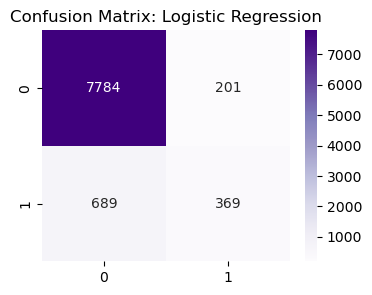


Random Forest F1-Score: 0.4863


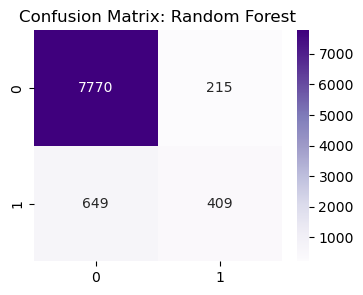

In [3]:
# Initialize and Train
log_model = LogisticRegression(max_iter=1000)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

log_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Evaluation function
def check_performance(model, name):
    preds = model.predict(X_test)
    f1 = f1_score(y_test, preds)
    print(f"\n{name} F1-Score: {f1:.4f}")
    
    plt.figure(figsize=(4,3))
    sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='d', cmap='Purples')
    plt.title(f"Confusion Matrix: {name}")
    plt.show()

check_performance(log_model, "Logistic Regression")
check_performance(rf_model, "Random Forest")

Global Feature Importance:


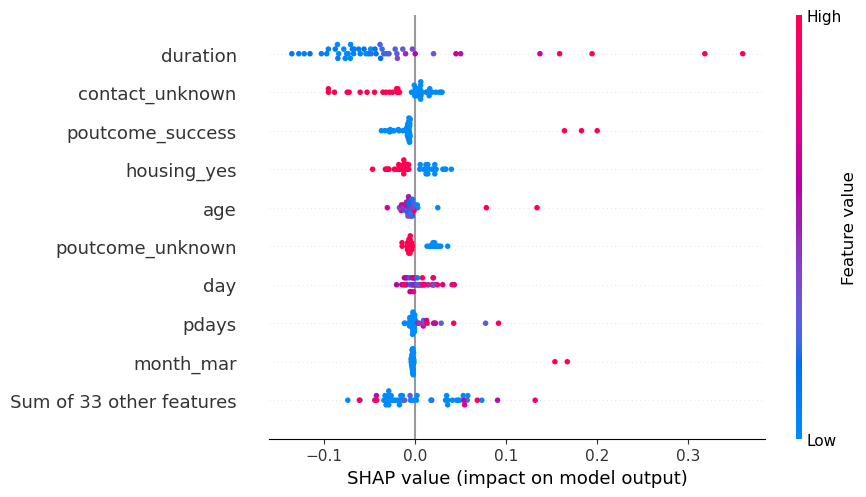


Explaining 5 Specific Predictions using Waterfall Plots:
Customer 1:


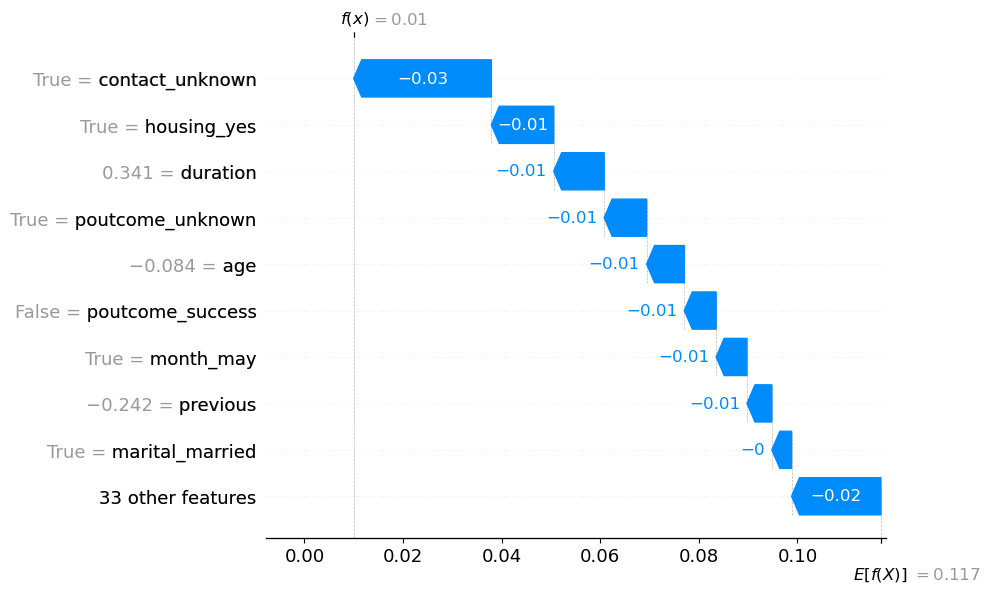

Customer 2:


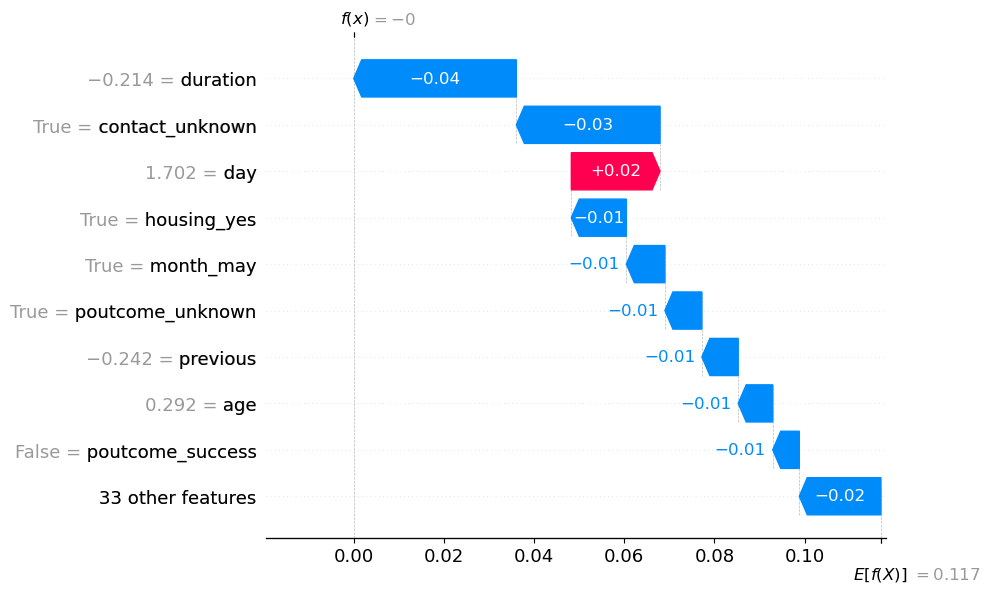

Customer 3:


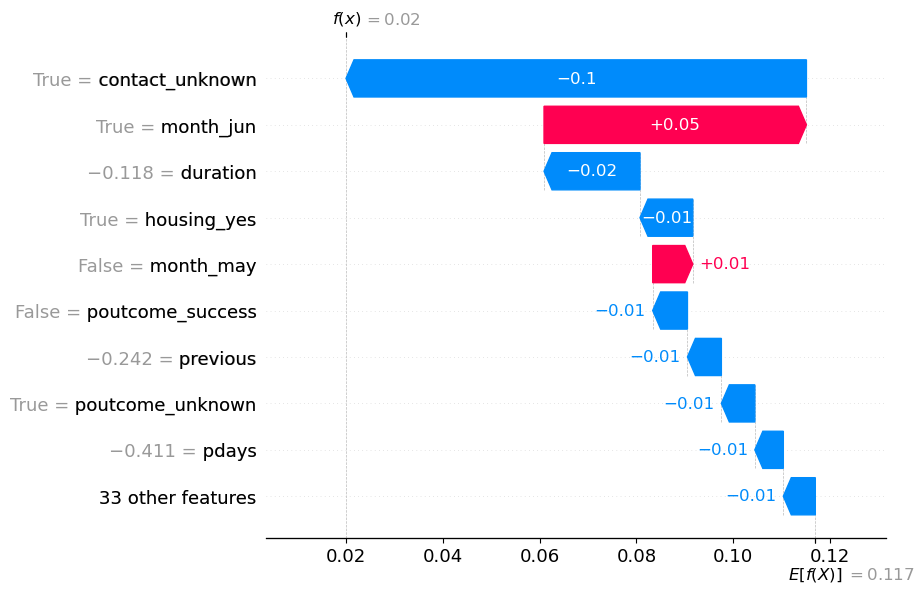

Customer 4:


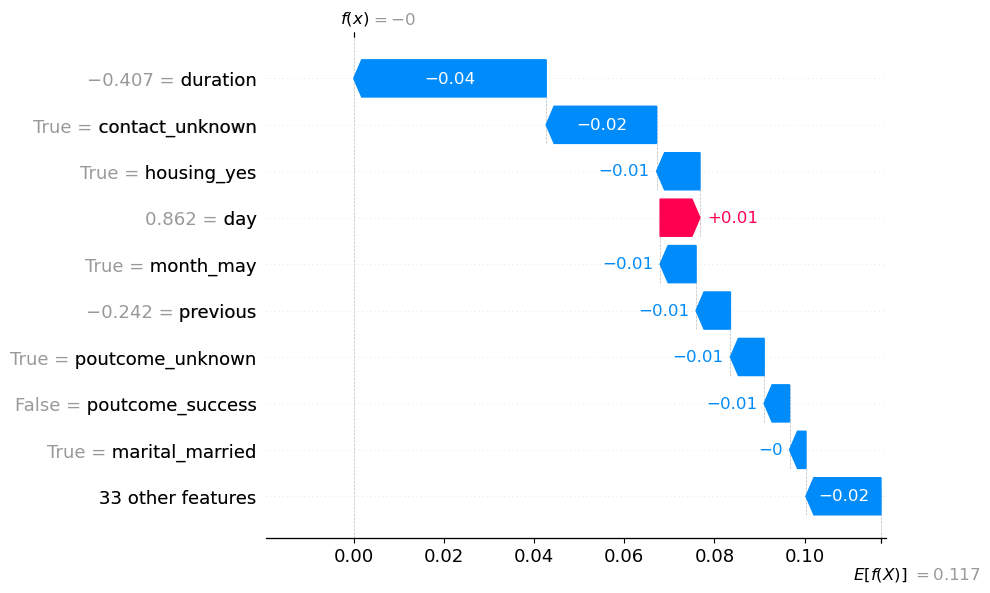

Customer 5:


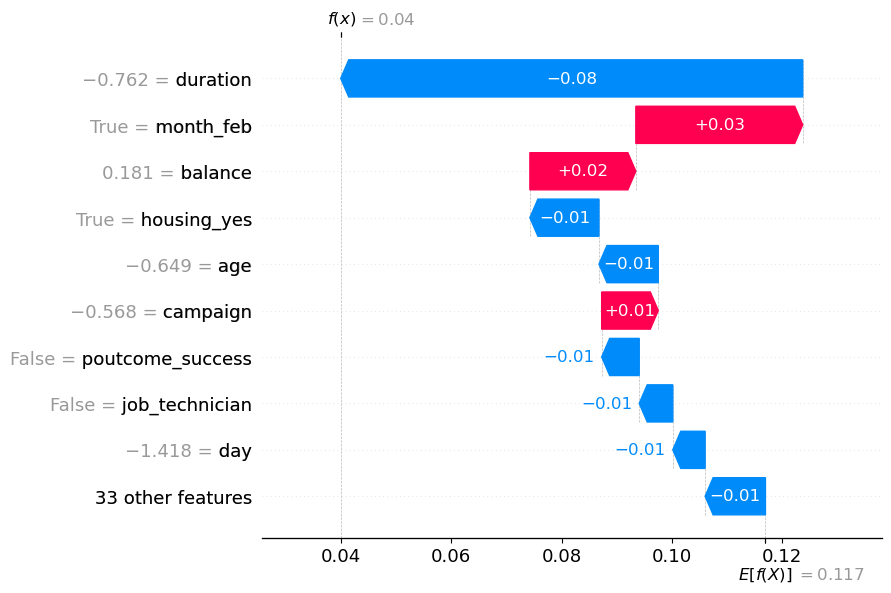

In [6]:
# --- FINAL FIXED SHAP STEP ---
import shap
import matplotlib.pyplot as plt

# 1. Initialize Explainer
explainer = shap.TreeExplainer(rf_model)
# Calculate SHAP values for the first 50 samples
shap_values_all = explainer(X_test.iloc[:50])

# 2. Global Importance Plot (Summary)
print("Global Feature Importance:")
# We take [:, :, 1] to get values for the 'Yes' (subscription) class
shap.plots.beeswarm(shap_values_all[:, :, 1])

# 3. Individual Explanations for 5 customers
print("\nExplaining 5 Specific Predictions using Waterfall Plots:")
for i in range(5):
    plt.figure() # Create a new figure for each plot
    print(f"Customer {i+1}:")
    
    # shap_values_all[i, :, 1] gives the explanation for the i-th customer for class 1
    shap.plots.waterfall(shap_values_all[i, :, 1], max_display=10)
    plt.show()